# 05 - LightGBM

In [13]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [14]:
# Load dataset
df = pd.read_csv("bank_numeric.csv")

In [15]:
# Define features and target
target_column = "deposit"
X = df.drop(columns=[target_column])
y = df[target_column]

In [16]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
# Initialize LightGBM classifier
lgbm_model = LGBMClassifier(
    n_estimators=1000,  # Number of boosting rounds
    learning_rate=0.05,  # Learning rate
    max_depth=-1,  # Unlimited depth unless specified
    random_state=42
)

In [18]:
# Train the model
lgbm_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[LightGBM] [Info] Number of positive: 1670, number of negative: 2535
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 4205, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397146 -> initscore=-0.417370
[LightGBM] [Info] Start training from score -0.417370


LGBMClassifier(learning_rate=0.05, n_estimators=1000, random_state=42)

In [19]:
# Make predictions
y_pred = lgbm_model.predict(X_test)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# very good results, but CatBoost had 89
# maybe because I didn’t manually 
# specify categorical variables for LightGBM

Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       609
           1       0.84      0.83      0.84       443

    accuracy                           0.86      1052
   macro avg       0.86      0.86      0.86      1052
weighted avg       0.86      0.86      0.86      1052



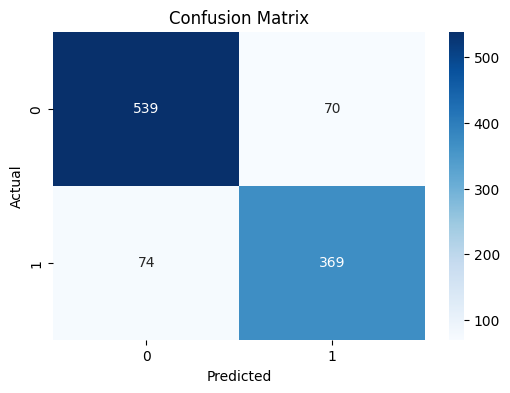

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix is a bit better in CatBoost too